In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [3]:
basedir = 'Out/'

In [4]:
well1 = pd.read_csv(basedir + "Well1-PorSw.csv")
well2 = pd.read_csv(basedir + "Well2-PorSw.csv")
well3 = pd.read_csv(basedir + "Well3-PorSw.csv")
well4 = pd.read_csv(basedir + "Well4-PorSw.csv")
well5 = pd.read_csv(basedir + "Well5-PorSw.csv")
well6 = pd.read_csv(basedir + "Well6-PorSw.csv")

In [5]:
well1.rename(columns={'density_Porosity':'density_porosity'}, inplace = True)

In [6]:
Vsh_cut = 0.45
Por_cut = 0.125
Sw_cut = 0.45

In [7]:
cutoff = {"Vsh": Vsh_cut, "Por": Por_cut, "Sw": Sw_cut}

### Main Function 

In [8]:
def apply_cut(df, cutOff):
    """Function that takes a cutOff subsurface poperty DataFrame and Applies Cut off
       
       Parameters:
            df (pd.DataFrame) - DataFrame containing fluid and rock properties
            cutOff (dict) - {property: cut-off value}     
        Note:
            Nan values should be removed before passing a DataFrame to the function to avoid conflicts
    """ 
    Vsh = np.array(df['Vshale'])
    por = np.array(df['density_porosity'])
    Sw = np.array(df['Sw'])
    TVD = np.array(df['TVD'])
    gross_thickness = TVD[-1] - TVD[0]
    Vsh_In = []
    por_In = []
    Sw_In = []
    TVD_In = []
    i = 0
    Thickness = []
    
    while(TVD[i]!=TVD[-1]):
        Vsh_In.append((Vsh[i] + Vsh[i+1]) * 0.5)
        por_In.append((por[i] + por[i+1]) * 0.5)
        Sw_In.append((Sw[i] + Sw[i+1]) * 0.5)
        TVD_In.append((TVD[i+1] + TVD[i]) * 0.5)
        Thickness.append(TVD[i+1] - TVD[i])
        i+=1
    data = {'TVD': TVD_In, 'Thickness': Thickness, 'Sw_In': Sw_In, 'por_In': por_In, 'Vsh_In': Vsh_In}    
    modified = pd.DataFrame(data)
    filtered = modified[(modified['Vsh_In'] < cutOff['Vsh']) & (modified['por_In'] > cutOff['Por']) & 
                                                               (modified['Sw_In'] < cutOff['Sw'])]
    net_thickness = np.sum(filtered['Thickness'])
    net2gross = net_thickness/gross_thickness
    return (net2gross, filtered)
    

### Well 1 Cut Off appliance

In [12]:
well1_NTG, well1_cut = apply_cut(well1, cutoff) 
print("Net to Gross: {}\n".format(well1_NTG))
print("Cut Off applied Properties:\n {}\n".format(well1_cut))

Net to Gross: 0.9353711790393013

Cut Off applied Properties:
            TVD  Thickness     Sw_In    por_In    Vsh_In
9     10259.75        0.5  0.390301  0.216298  0.365761
10    10260.25        0.5  0.291450  0.234530  0.352681
11    10260.75        0.5  0.229349  0.253039  0.345668
12    10261.25        0.5  0.211087  0.262707  0.339726
13    10261.75        0.5  0.220151  0.257459  0.328238
...        ...        ...       ...       ...       ...
1098  10804.25        0.5  0.364014  0.241160  0.408543
1099  10804.75        0.5  0.368752  0.241989  0.348812
1100  10805.25        0.5  0.375026  0.241713  0.379068
1108  10809.25        0.5  0.428042  0.236740  0.301226
1109  10809.75        0.5  0.444936  0.234530  0.144290

[1071 rows x 5 columns]



In [11]:
well1_cut.to_csv("cutoffapplied/well1Filtered.csv")

### Well 2 Cut Off applience

In [13]:
well2_NTG, well2_cut = apply_cut(well2, cutoff)

In [14]:
well2_NTG

0.42701525054466233

In [15]:
well2_cut.to_csv("cutoffapplied/well2Filtered.csv")

### Well 3 Cut Off applience

In [16]:
well3_NTG, well3_cut = apply_cut(well3, cutoff)

In [17]:
well3_NTG

0.747159058880523

In [18]:
well3_cut.to_csv("cutoffapplied/well3Filtered.csv")

### Well 4 Cut Off applience

In [19]:
well4_NTG, well4_cut = apply_cut(well4, cutoff)

In [20]:
well4_NTG

0.9930612593160283

In [21]:
well4_cut.to_csv("cutoffapplied/well4Filtered.csv")

### Well 5 Cut Off applience

In [22]:
well5_NTG, well5_cut = apply_cut(well5,cutoff)

In [23]:
well5_NTG

0.6807503432241916

In [24]:
well5_cut.to_csv("cutoffapplied/well5Filtered.csv")

### Well6 Cut Off applience

In [25]:
well6_NTG, well6_cut = apply_cut(well6, cutoff)

In [26]:
well6_NTG

0.4419206444668736

In [27]:
well6_cut.to_csv("cutoffapplied/well6Filtered.csv")

## Random Take

In [27]:
# Porosity Distribution

por = np.concatenate([np.array(well1_cut['por_In']), np.array(well2_cut['por_In']),
                     np.array(well3_cut['por_In']), np.array(well4_cut['por_In']),
                     np.array(well5_cut['por_In']), np.array(well6_cut['por_In'])])

(array([ 11.,  16.,  46.,  30.,  51.,  66.,  99., 179., 353., 475., 643.,
        829., 649., 359., 237., 126.,  49.,  30.,  15.,  13.]),
 array([0.13121547, 0.14191989, 0.15262431, 0.16332873, 0.17403315,
        0.18473757, 0.19544199, 0.20614641, 0.21685083, 0.22755525,
        0.23825967, 0.24896409, 0.25966851, 0.27037293, 0.28107735,
        0.29178177, 0.30248619, 0.31319061, 0.32389503, 0.33459945,
        0.34530387]),
 <a list of 20 Patch objects>)

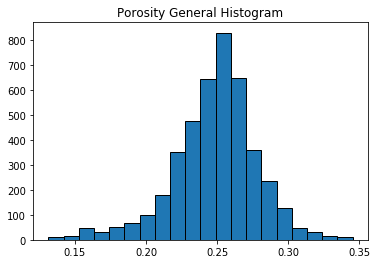

In [30]:
plt.gca().set_title("Porosity General Histogram")
plt.hist(por, edgecolor = 'black', bins = 20)

In [32]:
# Sw Distribution

Sw = np.concatenate([np.array(well1_cut['Sw_In']), np.array(well2_cut['Sw_In']),
                     np.array(well3_cut['Sw_In']), np.array(well4_cut['Sw_In']),
                     np.array(well5_cut['Sw_In']), np.array(well6_cut['Sw_In'])])

In [39]:
len(por)

4276

(array([425., 455., 596., 782., 766., 500., 344., 181., 134.,  93.]),
 array([0.05831881, 0.09744186, 0.13656492, 0.17568798, 0.21481103,
        0.25393409, 0.29305715, 0.33218021, 0.37130326, 0.41042632,
        0.44954938]),
 <a list of 10 Patch objects>)

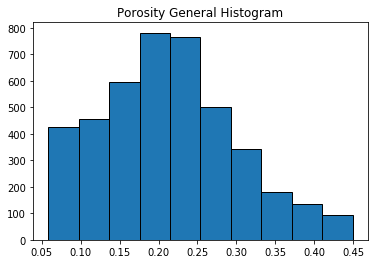

In [35]:
plt.gca().set_title("Porosity General Histogram")
plt.hist(Sw, edgecolor = 'black', bins = 10)

### Monte Fucking Carlo

In [40]:
mc = []
for i in range(1000000):
    random = random.ra
    Sw_random = Sw[random]
    por_random = por[random]
    
    mc.append(Sw_random*por_random)

AttributeError: 'int' object has no attribute 'randint'